In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Importing Data

df = pd.read_csv(r"D:\Data Science\MACHINE LEARNING\Assignment\Assignment-2 Problems using Data Preprocessing\Assignment-2 Problems using Data Preprocessing\Estimate the total compensation to be provided to an employee\train_set.csv")
df

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287831,2016,3,Human Welfare & Neighborhood Development,DSS,Human Services,535,"SEIU - Human Services, Local 1021",Human Services,Senior Eligibility Worker,9610,78980,30115,13068.80,Fiscal,147079
287832,2015,5,Culture & Recreation,LIB,Public Library,790,"SEIU - Miscellaneous, Local 1021",Library,Librarian 1,790,30704,0,5465.57,Calendar,40174
287833,2014,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,6,"Electrical Workers, Local 6",Journeyman Trade,Electronic Maintenance Tech,38352,104451,0,13054.94,Calendar,164669
287834,2013,1,Public Protection,JUV,Juvenile Probation,250,"SEIU - Health Workers, Local 1021",Housekeeping & Laundry,Porter,29266,14425,0,4051.90,Calendar,19594


In [6]:
# checking is there any null value or not.
df.isnull().sum() 

Year                   0
OGC                    0
OG                     0
DC                     0
Dept                   0
UC                     0
Union                 36
JF                    38
Job                    0
EI                     0
Salaries               0
Overtime               0
H/D                    0
YT                     0
Total_Compensation     0
dtype: int64

In [7]:
df.dropna(how='any', axis=0, inplace=True)


In [8]:
df.head()

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287798 entries, 0 to 287835
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                287798 non-null  int64  
 1   OGC                 287798 non-null  int64  
 2   OG                  287798 non-null  object 
 3   DC                  287798 non-null  object 
 4   Dept                287798 non-null  object 
 5   UC                  287798 non-null  int64  
 6   Union               287798 non-null  object 
 7   JF                  287798 non-null  object 
 8   Job                 287798 non-null  object 
 9   EI                  287798 non-null  int64  
 10  Salaries            287798 non-null  int64  
 11  Overtime            287798 non-null  int64  
 12  H/D                 287798 non-null  float64
 13  YT                  287798 non-null  object 
 14  Total_Compensation  287798 non-null  int64  
dtypes: float64(1), int64(7), object(7)

<AxesSubplot:>

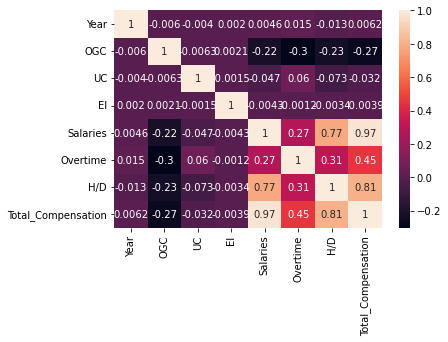

In [10]:
sns.heatmap(df.corr(), annot=True)

## Feature Selection

In [11]:
x = df.loc[:,['Salaries','Overtime','H/D']]
y = df.iloc[0:,-1]
x

,Salaries,Overtime,H/D
0,12196,0,0.00
1,74639,2820,12703.31
2,100554,0,12424.50
3,140164,52754,13043.87
4,58813,0,7655.28
...,...,...,...
287831,78980,30115,13068.80
287832,30704,0,5465.57
287833,104451,0,13054.94
287834,14425,0,4051.90


<AxesSubplot:xlabel='H/D'>

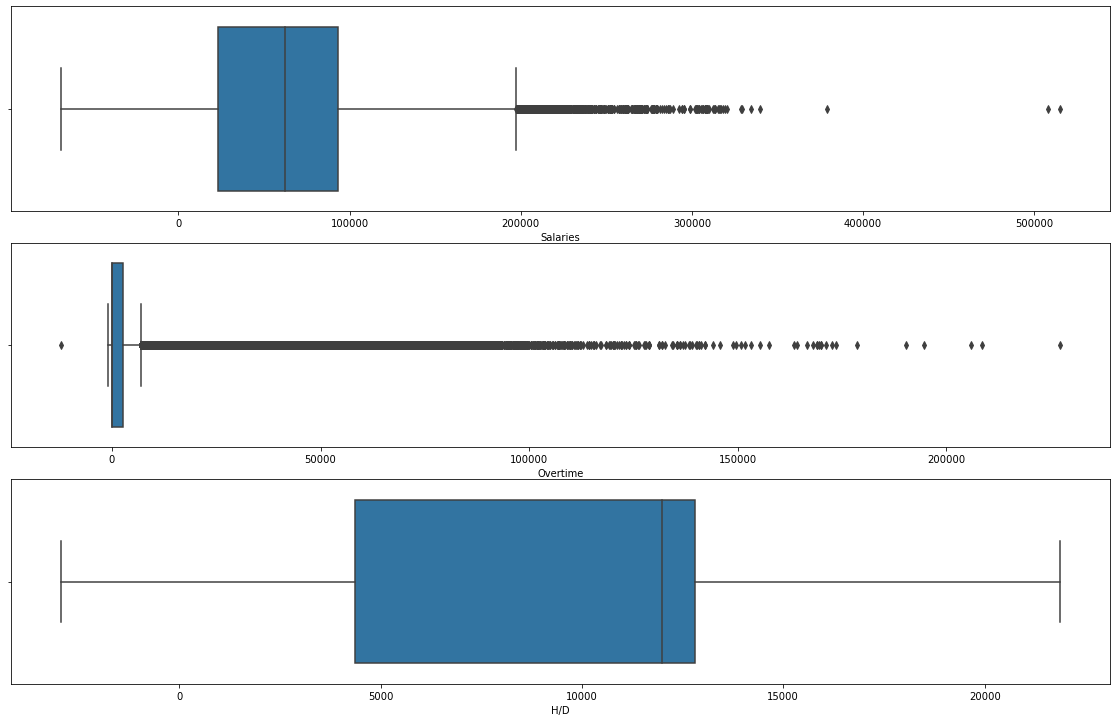

In [12]:
f, ax = plt.subplots(3, 1, figsize=(16,10))
f.tight_layout()
ax1,ax2,ax3 = ax.flatten()
sns.boxplot(x = x['Salaries'], ax=ax1)
#ax1.set_title('Slaries')
sns.boxplot(x = x['Overtime'], ax=ax2)
#ax2.set_title('Overtime')
sns.boxplot(x = x['H/D'], ax=ax3)
#ax3.set_title('H/D')

In [13]:
df1 = df[df.Salaries < 350000]
x = df1.loc[:,['Salaries','Overtime','H/D']]
y = df1.iloc[0:,-1]

### Model Training & Evaluation

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

#### Linear Regressors

In [15]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

#Linear regression
lin_reg = LinearRegression(normalize=False)
lin_reg.fit(x_train, y_train)
y_predict_lin_reg = lin_reg.predict(x_test)

#Lasso
lasso = Lasso(alpha=0.1, normalize=False)
lasso.fit(x_train, y_train)
y_predict_lasso = lasso.predict(x_test)

#Ridge
ridge = Ridge(alpha=0.1, normalize=False)
ridge.fit(x_train, y_train)
y_predict_ridge = ridge.predict(x_test)

print(lin_reg.score(x_test, y_test),'\n', lasso.score(x_test, y_test),'\n', ridge.score(x_test, y_test))

D:\Data Science\edyodha packages\conda.2022\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
D:\Data Science\edyodha packages\conda.2022\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
D:\Data Science\edyodha packages\conda.2022\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' wa

0.9875301914824499 
 0.9875301914820687 
 0.9875301914824499


In [16]:
from sklearn.metrics import mean_squared_error

rms_lin_reg = mean_squared_error(y_test, y_predict_lin_reg, squared=False)
rms_lasso = mean_squared_error(y_test, y_predict_lasso, squared=False)
rms_ridge = mean_squared_error(y_test, y_predict_ridge, squared=False)

print(rms_lin_reg,'\n', rms_lasso,'\n', rms_ridge)

7561.922468367044 
 7561.9224684826695 
 7561.922468367045


### Random Forest

In [18]:
from sklearn.ensemble import RandomForestRegressor

randForest = RandomForestRegressor()
randForest.fit(x_train, y_train)

y_predict_randForest = randForest.predict(x_test)
print(randForest.score(x_test, y_test),'\n',mean_squared_error(y_test, y_predict_randForest, squared=False))

0.9885271900964369 
 7253.326493923648


### Neural Network

In [19]:
from sklearn.neural_network import MLPRegressor

NN = MLPRegressor(alpha=1e-5, random_state=42)
NN.fit(x_train, y_train)

y_predict_NN = NN.predict(x_test)
print(NN.score(x_test, y_test),'\n',mean_squared_error(y_test, y_predict_NN, squared=False))

0.9880935285369851 
 7389.139499087499


## Test Data

In [22]:
testData = pd.read_csv(r"D:\Data Science\MACHINE LEARNING\Assignment\Assignment-2 Problems using Data Preprocessing\Assignment-2 Problems using Data Preprocessing\Estimate the total compensation to be provided to an employee\train_set.csv")
testData

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287831,2016,3,Human Welfare & Neighborhood Development,DSS,Human Services,535,"SEIU - Human Services, Local 1021",Human Services,Senior Eligibility Worker,9610,78980,30115,13068.80,Fiscal,147079
287832,2015,5,Culture & Recreation,LIB,Public Library,790,"SEIU - Miscellaneous, Local 1021",Library,Librarian 1,790,30704,0,5465.57,Calendar,40174
287833,2014,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,6,"Electrical Workers, Local 6",Journeyman Trade,Electronic Maintenance Tech,38352,104451,0,13054.94,Calendar,164669
287834,2013,1,Public Protection,JUV,Juvenile Probation,250,"SEIU - Health Workers, Local 1021",Housekeeping & Laundry,Porter,29266,14425,0,4051.90,Calendar,19594


In [23]:
test_x = testData.loc[:,['Salaries','Overtime','H/D']]
test_x

,Salaries,Overtime,H/D
0,12196,0,0.00
1,74639,2820,12703.31
2,100554,0,12424.50
3,140164,52754,13043.87
4,58813,0,7655.28
...,...,...,...
287831,78980,30115,13068.80
287832,30704,0,5465.57
287833,104451,0,13054.94
287834,14425,0,4051.90


<AxesSubplot:xlabel='H/D'>

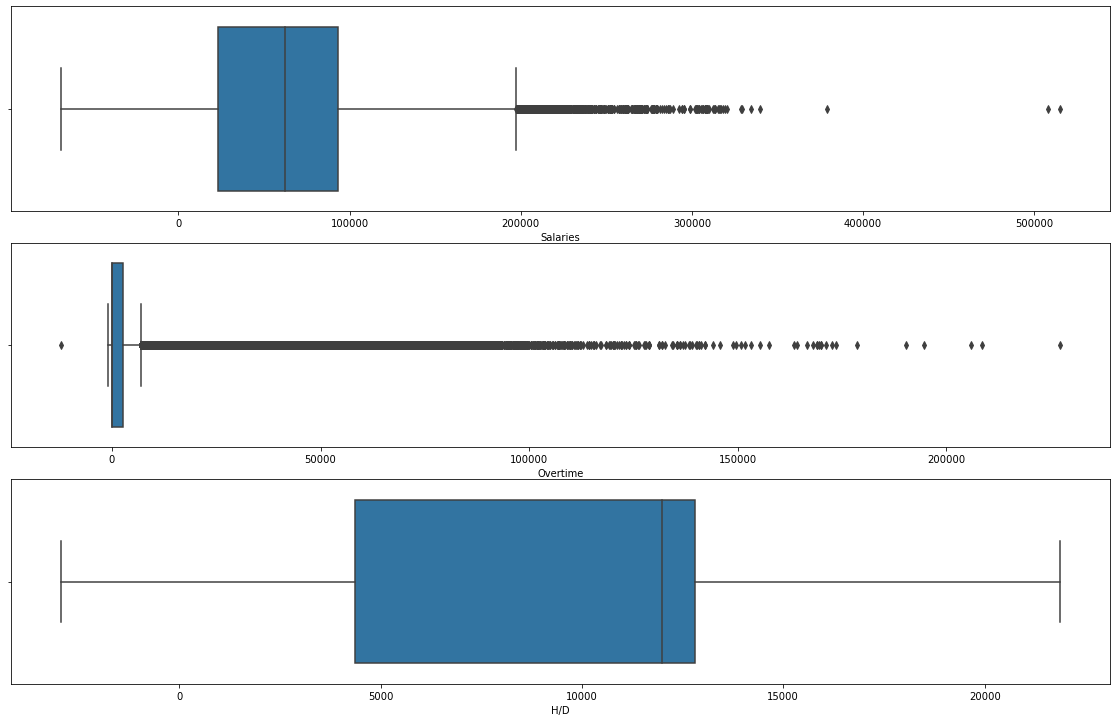

In [24]:
f, ax = plt.subplots(3, 1, figsize=(16,10))
f.tight_layout()
ax1,ax2,ax3 = ax.flatten()
sns.boxplot(x = test_x['Salaries'], ax=ax1)
#ax1.set_title('Slaries')
sns.boxplot(x = test_x['Overtime'], ax=ax2)
#ax2.set_title('Overtime')
sns.boxplot(x = test_x['H/D'], ax=ax3)
#ax3.set_title('H/D')

In [29]:
pred_y_xgb = lin_reg.predict(test_x)

res = pd.DataFrame(pred_y_xgb) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = testData.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["Compensation"]
res.to_csv("prediction_lin_reg.csv", index = False)

Predicted data has been saved into my drive as 'prediction_lin_reg.csv'

In [30]:
pd.read_csv(r"D:\Data Science\MACHINE LEARNING\Assignment\Assignment-2 Problems using Data Preprocessing\Assignment-2 Problems using Data Preprocessing\Estimate the total compensation to be provided to an employee\prediction_lin_reg.csv")

,Compensation
0,16265.596816
1,115161.901484
2,145166.427916
3,260288.284092
4,85517.142991
...,...
287831,153781.104126
287832,46504.385326
287833,150944.829247
287834,23745.995946
